Source: https://quantumai.google/cirq/tutorials/basics

In [2]:
import cirq
import cirq_google

Cirq has three main ways of defining qubits:
- **cirq.NamedQubit** to label qubits by an abstract name
- **cirq.LineQubit**  to label qubits by number in a linear array
- **cirq.GridQubit**  to label qubits by two numbers in a rectangular lattice

In [11]:
#named qubits are useful for abstract algorithms
#and algorithms not yet mapped onto hardware

q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

print(q0)
print(q1)

q0, q1

source
target


(cirq.NamedQubit('source'), cirq.NamedQubit('target'))

In [10]:
# line qubits can be created individually

q3 = cirq.LineQubit(3)

print(q3)
q3

3


cirq.LineQubit(3)

In [9]:
# line qubits can be created in a range
# this creates LineQubit(0), LineQubit(1), LineQubit(2)

q0, q1, q2 = cirq.LineQubit.range(3)

print(q0,q1,q2)
q0, q1, q2

0 1 2


(cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))

In [14]:
# GridQubits can be referenced individually

q4_5 = cirq.GridQubit(4,5)

print(q4_5)
q4_5

(4, 5)


cirq.GridQubit(4, 5)

In [17]:
# GridQubits can also be created in bulk in a square
# here we create 16 qubits from (0,0) to (3,3)

qubits = cirq.GridQubit.square(4)

print(qubits)
qubits

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(1, 3), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2), cirq.GridQubit(2, 3), cirq.GridQubit(3, 0), cirq.GridQubit(3, 1), cirq.GridQubit(3, 2), cirq.GridQubit(3, 3)]


[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(1, 0),
 cirq.GridQubit(1, 1),
 cirq.GridQubit(1, 2),
 cirq.GridQubit(1, 3),
 cirq.GridQubit(2, 0),
 cirq.GridQubit(2, 1),
 cirq.GridQubit(2, 2),
 cirq.GridQubit(2, 3),
 cirq.GridQubit(3, 0),
 cirq.GridQubit(3, 1),
 cirq.GridQubit(3, 2),
 cirq.GridQubit(3, 3)]

There are pre-packaged sets of qubits called **Devices** which are qubits plus a set of rules for how they can be used. A **cirq.Device** can be used to apply adjacency rules(??) and other hardware constraints to a quantum circuit.

In [19]:
# this device is a 2X11 grid that mimics early Google hardware

print(cirq_google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


### Gates and Operations

* A **Gate** is an effect that can be applied to a set of qubits
* An **Operation** is a gate applied to a set of qubits

For example, the Hadamard gate is **cirq.H** and is a gate object, whereas **cirq.H(cirq.LineQubit(1))** is an operation object representing the Hadamard gate applied to a specific qubit (line qubit number 1)

The Pauli gates:
* **cirq.X**
* **cirq.Y**
* **cirq.Z**

Common two-qubit gates:
* **cirq.CZ**
* **cirq.CNOT**
* **cirq.SWAP**

There's also **cirq.measure** which is a macro to apply a measurement gate to a set of qubits.

You can also [create your own gates](https://quantumai.google/cirq/gates)

In [20]:
#example gates

not_gate = cirq.CNOT
pauli_z = cirq.Z

In [21]:
#use exponentiation to get square root gates

sqrt_x_gate = cirq.X ** 0.5
sqrt_iswap = cirq.ISWAP ** 0.5

In [22]:
# some gates take parameters

sqrt_sqrt_y = cirq.YPowGate(exponent = 0.25)

In [24]:
#example operations

q0, q1 = cirq.LineQubit.range(2)

z_op = cirq.Z(q0)

not_op = cirq.CNOT(q0,q1)

sqrt_iswap_op = sqrt_iswap(q0,q1)

### Circuits and Moments

A **Moment** is a collection of operations acting during the same abstract time slice, and a **Circuit** is a collection of moments. Each operation must have a disjoint set of qubits from other operations in a moment.

In [25]:
circuit = cirq.Circuit()

#you can create a circuit by appending to it
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))

print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [27]:
# we can create circuits directly

cirq.Circuit(cirq.SWAP(q,q+1) for q in cirq.LineQubit.range(3))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───

To construct a circuit without automatically shifting operations all the way to the left, you can create the circuit moment-by-moment or use a different **InsertStrategy**

In [29]:
# create gates in separate moments
cirq.Circuit( cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3) )

0: ───H───────────

1: ───────H───────

2: ───────────H───

###  Circuits and devices

There are often hardward contraints on a circuit, and creating a circuit with a **Device** will capture some of these requirements. The Device objects validate the operations you add to the circuit and ensure no illegal operations are added

In [30]:
#let's set up 3 qubits and 2 operations

q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)
q2 = cirq.GridQubit(0,2)

adjacent_op = cirq.CZ(q0, q1)
nonadjacent_op = cirq.CZ(q0, q2)

In [31]:
# an unconstrained circuit with no device

free_circuit = cirq.Circuit()

#both operations are allowed:

free_circuit.append(adjacent_op)
free_circuit.append(nonadjacent_op)

free_circuit

(0, 0): ───@───@───
           │   │
(0, 1): ───@───┼───
               │
(0, 2): ───────@───

In [34]:
# circuit on Foxtail device

foxtail_circuit = cirq.Circuit(device = cirq_google.Foxtail)
foxtail_circuit.append(adjacent_op)

# this will throw an error
try:
    foxtail_circuit.append(nonadjacent_op)
except ValueError as e:
    print(e)

Non-local interaction: cirq.CZ(cirq.GridQubit(0, 0), cirq.GridQubit(0, 2)).


### Simulation

Cirq comes bundled with a **Simulator** that calculates the results of circuits up to a limit of about 20 qubits, and is initialized with **cirq.Simulator()**

In [44]:
# simulating a 2-qubit Bell State
# 1/sqrt(2) * ( |00> + |11> )

#initialize circuit
bell_circuit = cirq.Circuit()

#set up the qubits and operations
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0,q1))

#initialize Simulator
s = cirq.Simulator()

#and simulate the results
results = s.simulate(bell_circuit)
results

measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩

In [45]:
#for sampling, add a measurement at the end
bell_circuit.append(cirq.measure(q0,q1,key='result'))

#sample the circuit
samples = s.run(bell_circuit, repetitions=1000)
samples.histogram(key='result')

Counter({3: 519, 0: 481})

In [46]:
bell_circuit

0: ───H───@───M('result')───
          │   │
1: ───────X───M─────────────

### Parameter sweeps

Gates can have free parameters within the circuit. This is especially useful for variational algorithms, which vary parameters to optimize a cost function

For parameters, cirq uses the **sympy** library to add **sympy.Symbol** as parameters to gates and operations. When the circuit is complete you can fill in possible parameter values with a **Sweep**:

* **cirq.Points** a list of manually specified float values for one specific symbol
* **cirq.Linspace** a linear sweep from a starting value to an ending value
* **cirq.ListSweep** a list of manually specified dictionary values for several different symbols
* **cirq.Zip** and **cirq.Product** combine sweeps list-wise by zipping together or by cartesian product

A parametrized circuit and sweep can be run together using the simulator by changing **run()** to **run_sweep()** and adding the sweep as a parameter

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

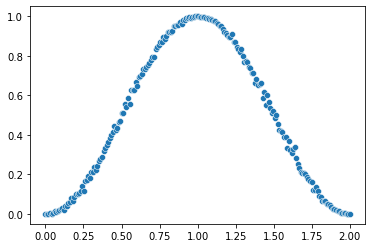

In [59]:
#example of sweeping the exponent of an X gate

#perform an X gate with a variable exponent
q = cirq.GridQubit(1,1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# sweep exponent from off (0) to on (1) and back to off (2)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

#simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions = 1000)

#plot the results
x_data = [ trial.params['t'] for trial in trials ]
y_data = [ trial.histogram(key='m')[1] / 1000.0 for trial in trials ]

sns.scatterplot(x=x_data,y=y_data);

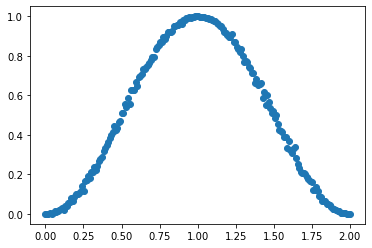

In [60]:
plt.scatter(x_data,y_data)

### Unitary matrices and decompositions

Most quantum operations have a unitary matrix associated with them, accessed by **cirq.unitary()**

In [61]:
print(f"X gate:\n {cirq.unitary(cirq.X)}")

X gate:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [62]:
print(f"Hadamard gate:\n {cirq.unitary(cirq.H)}")

Hadamard gate:
 [[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


In [64]:
q0,q1 = cirq.LineQubit.range(2)
print(f"SWAP gate:\n {cirq.unitary(cirq.SWAP(q0,q1))}")

SWAP gate:
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [66]:
print(f"X and SWAP combined:\n{cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0,q1)))}")

X and SWAP combined:
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


##### Decompositions

Some gates can be decomposed into an equivalent circuit with simpler operations and gates using **cirq.decompose**

In [69]:
#decomposing a Hadamard gate into X and Y gates

cirq.decompose(cirq.H(cirq.LineQubit(0)))

[(cirq.Y**0.5).on(cirq.LineQubit(0)),
 cirq.XPowGate(exponent=1.0, global_shift=-0.25).on(cirq.LineQubit(0))]

In [70]:
#decomposing a 3-qubit Toffoli gate
#many devices do not support 3-qubit gates, so having 2-qubit translations is useful

q0,q1,q2 = cirq.LineQubit.range(3)

cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0,q1,q2)))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───

In [71]:
cirq.Circuit(cirq.TOFFOLI(q0,q1,q2))

0: ───@───
      │
1: ───@───
      │
2: ───X───

Some devices automatically decompose gates they do not support

For example, adding an unsupported SWAP gate to the Foxtail device:

In [72]:
swap = cirq.SWAP(cirq.GridQubit(0,0), cirq.GridQubit(0,1))

cirq.Circuit(swap, device = cirq_google.Foxtail)

(0, 0): ───S^-1───Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───Z───
                           │                          │                   │
(0, 1): ───Z──────Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───S───

### Optimizers

An **Optimizer** can take a circuit and modify it, usually by combining or modifying operations to make it more efficient and shorter, and in theory it can do other circuit manipulations too

Here is the **MergeSingleQubitGates** which takes consecutive single-qubit operations and merges them

In [77]:
q0 = cirq.GridQubit(1,1)

optimizer = cirq.MergeSingleQubitGates()

c = cirq.Circuit(cirq.X(q0) ** 0.25, cirq.Y(q0) ** 0.25, cirq.Z(q0)**0.25)
print(f"Original:\n{c}\n")

optimizer.optimize_circuit(c)
print(f"Optimized:\n{c}")

Original:
(1, 1): ───X^0.25───Y^0.25───T───

Optimized:
           ┌                           ┐
(1, 1): ───│ 0.5  +0.707j -0.   -0.5j  │───────────
           │ 0.354+0.354j  0.146+0.854j│
           └                           ┘


Other optimizers can help transform a circuit into native operations on specific hardware devices